<a href="https://www.kaggle.com/code/chinmayameher/eda-haberman-s-survival-data-set?scriptVersionId=215810707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #f8f3e9; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; font-weight: bold; margin-bottom: 10px; font-size: 24px;">Haberman Survival Dataset</h1>
</div>

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)
* Attribute Information:
    1. Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3. Number of positive axillary nodes detected (numerical)
    4. Survival status (class attribute)
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year

* Missing Attribute Values: None

The objective of this notebook is to provide a comprehensive understanding of the Haberman dataset and demonstrate various exploratoratory data analysis and visualization techniques.

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #f8f3e9; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; font-weight: bold; margin-bottom: 10px; font-size: 24px;">1.Imports Liabraries</h1>
</div>

In [1]:
#Loading Liabraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/habermans-survival-data-set/haberman.csv


<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #f8f3e9; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; font-weight: bold; margin-bottom: 10px; font-size: 24px;">2.Dataset Description</h1>
</div>

In [2]:
#Load the data
haberman = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv")

In [3]:
haberman.shape

(305, 4)

In [4]:
#First 5 record of the dataset
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
#Info about dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
#The column names are not meaningful. So I have changed it t some meaningful name
haberman.rename(columns={'30': 'Age', '64': 'Year', '1': 'Node', '1.1': 'Survival'}, inplace=True)

In [7]:
#First 5 record of the dataset
haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [8]:
#Info about dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
haberman["Survival"].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [10]:
print('\n Statistical Information: ')
print(haberman.describe())


 Statistical Information: 
              Age        Year        Node    Survival
count  305.000000  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066    1.265574
std     10.744024    3.254078    7.199370    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


### Observation:

* 224 patients survived more than 5 year 
* 81 patients survived for less than 5 year
* Data is not balanced

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #f8f3e9; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; font-weight: bold; margin-bottom: 10px; font-size: 24px;">3.Data Visualization</h1>
</div>

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.1 Pair Plot</h2>
</div>

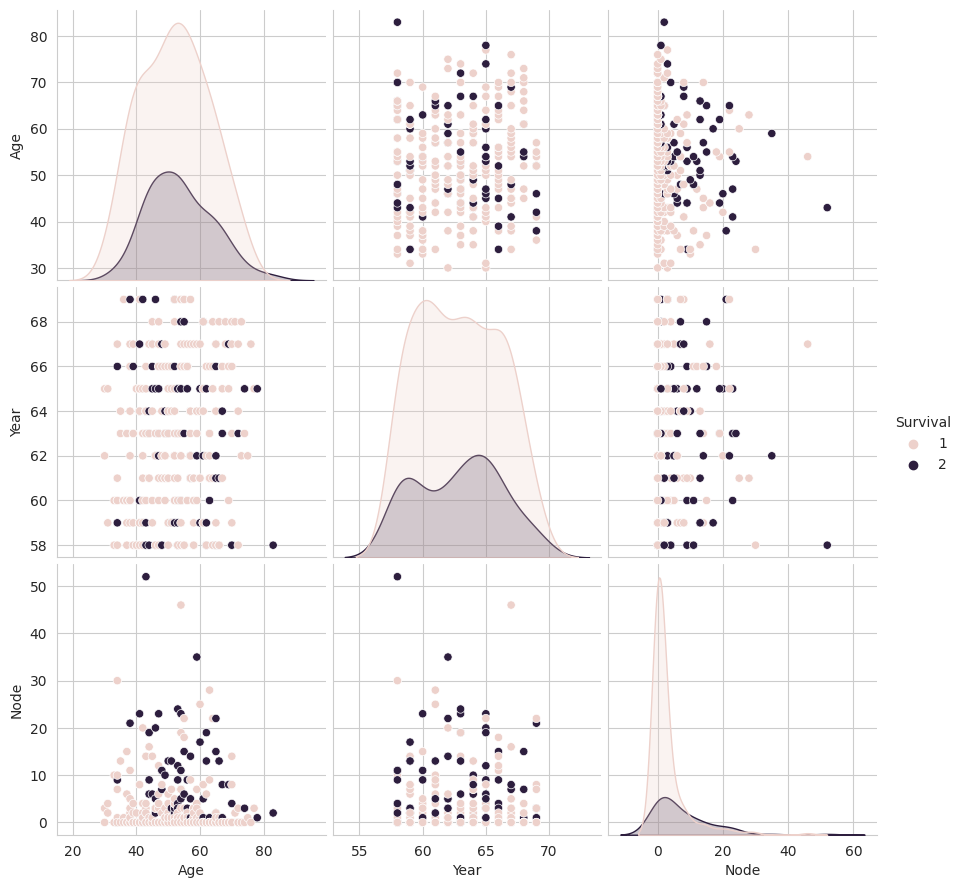

In [11]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = "Survival", height = 3)
plt.show()

### Observations:

* The data points are overlapping on each other. It is not a linearly separable case.
* Some points are clearly separable but there are very few such points.
* e.g. Person whose age is above 80 and having nodes between 0 and 10 fall under case2
* Person whose age is above 80 and had an operation in the year 58 fall under case 2
* Persons having operation between year 55 and 60 whose nodes are above 50 fall under case
* people whose ages are less 40 have high chances of falling in case 1
* people whose age is between 40 and 60, with nodes between 40 and 60 fall under case 1
* Similarly people whose has done operation between year 65 and 70 , having nodes between 40 and 50 fall under case1

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.2 Scatter Plot</h2>
</div>

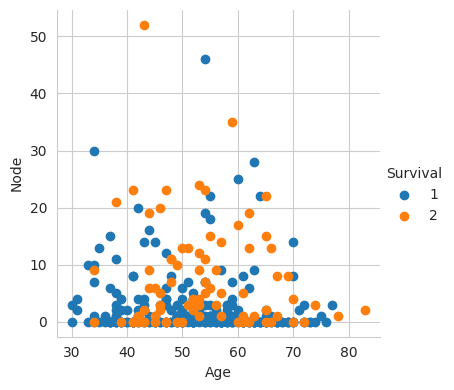

In [12]:
#Scatter Plot
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='Survival',height = 4).map(plt.scatter,"Age","Node").add_legend()
plt.show()

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.3 3D Plot</h2>
</div>

In [13]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='Age', y='Year', z='Node', color='Survival')
fig.show()

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.4 Density Plot and Histogram</h2>
</div>

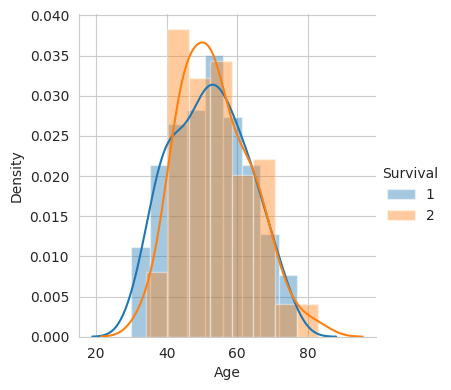

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue ="Survival", height= 4).map(sns.distplot, "Age").add_legend()
plt.show()

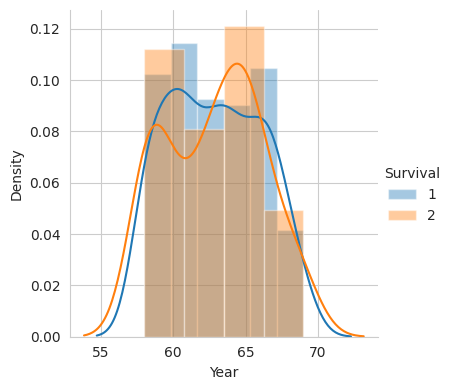

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = "Survival", height = 4).map(sns.distplot, "Year").add_legend()
plt.show()

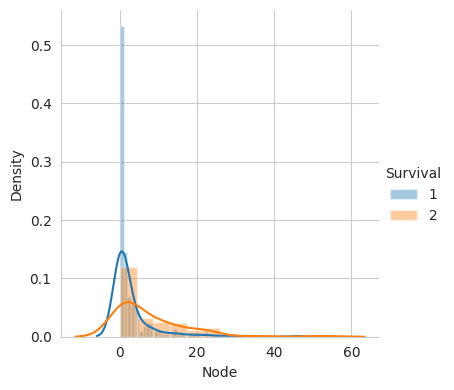

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = "Survival", height = 4).map(sns.distplot,"Node").add_legend()
plt.show()

### Observation:

* People whose number of nodes are greater than 50 falls under case 2

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.5 PDF(Probability Density Curve) and CDF (Cummulative Density Curve)</h2>
</div>

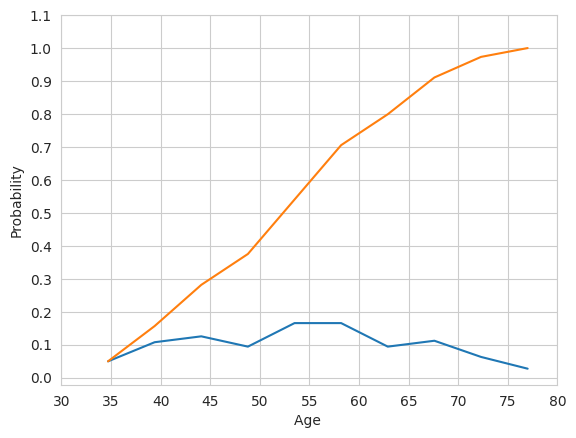

In [17]:
haberman_survived = haberman.loc[haberman["Survival"] == 1]
haberman_notsurvived = haberman.loc[haberman["Survival"] == 2]

#print(haberman)
#print(haberman_survived)

#Survived
counts, bin_edges = np.histogram(haberman_survived ['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Age ") 
plt.ylabel("Probability") 
# here i am scaling the axis for proper visualizatoin 
plt.xticks(np.arange(30,85,step = 5)) 
plt.yticks(np.arange(0.0,1.2,step = 0.1))
plt.show()

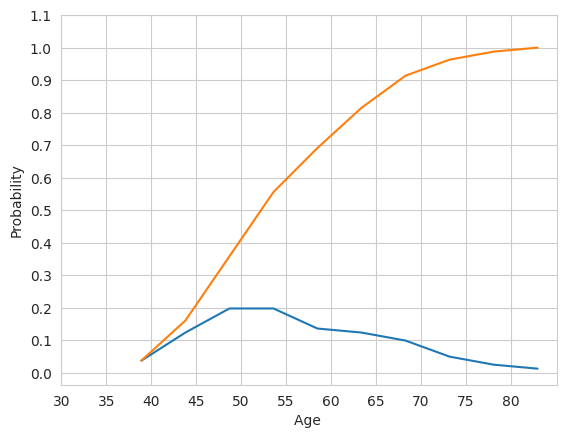

In [18]:
#Not Survived
counts, bin_edges = np.histogram(haberman_notsurvived ['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Age ") 
plt.ylabel("Probability") 
# here i am scaling the axis for proper visualizatoin 
plt.xticks(np.arange(30,85,step = 5)) 
plt.yticks(np.arange(0.0,1.2,step = 0.1))
plt.show()

### Observations:

* About 70% of the people whose age is below 58 are more likely to fall under case 1
* About 10% of the people whose age is above 68 are more likely to fall under case 2
* People whose age is below 53 have 55% chance to fall in case 2

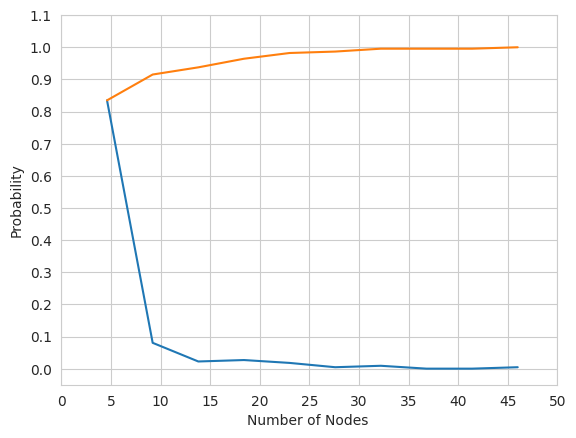

In [19]:
#Survived
counts, bin_edges = np.histogram(haberman_survived ['Node'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Number of Nodes ") 
plt.ylabel("Probability") 
# here i am scaling the axis for proper visualizatoin 
plt.xticks(np.arange(0,55,step = 5)) 
plt.yticks(np.arange(0.0,1.2,step = 0.1))
plt.show()

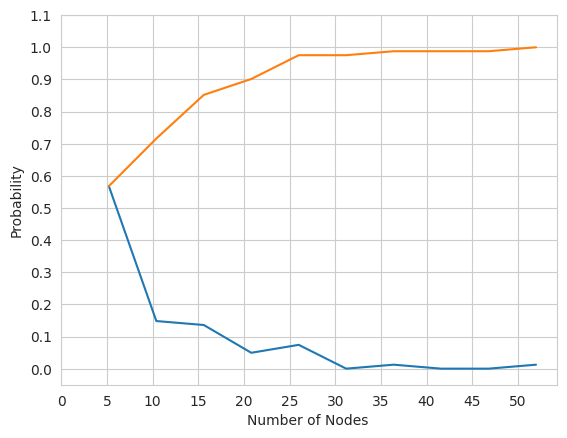

In [20]:
#Not Survived
counts, bin_edges = np.histogram(haberman_notsurvived ['Node'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Number of Nodes ") 
plt.ylabel("Probability") 
# here i am scaling the axis for proper visualizatoin 
plt.xticks(np.arange(0,55,step = 5)) 
plt.yticks(np.arange(0.0,1.2,step = 0.1))
plt.show()

### Observations:

* 82% of people having nodes <=5 fall in case 1
* 71% of people who has nodes <= 10 fall under case 2

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.6 Box Plot</h2>
</div>

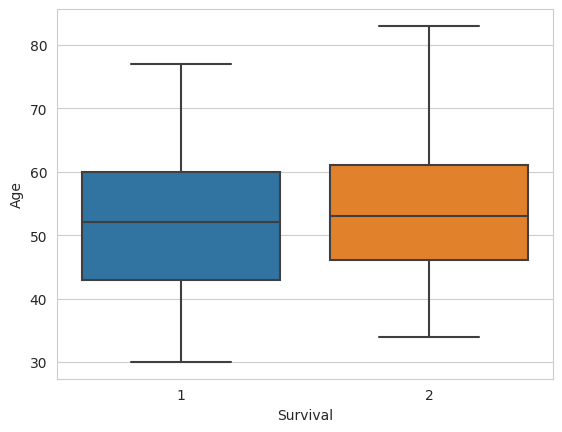

In [21]:
sns.boxplot(x='Survival',y='Age', data=haberman)
plt.show()

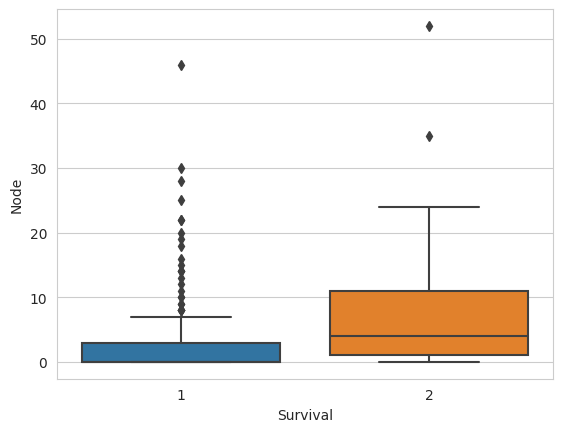

In [22]:
sns.boxplot(x='Survival',y='Node', data=haberman)
plt.show()

### Observations:

* There more no of outliers in nodes for the people falling in case1 it is difficult to interpet for case1
* In case 2 about 75 percentile of people have nodes below 12

<div style="background-color: #f8f3e9; padding: 20px; border: 1px solid #ccc; border-radius: 10px;">
    <h2 style="color: #005f5f; font-weight: normal; font-size: 22px; margin-top: 0;">3.7 Violin Plot</h2>
</div>

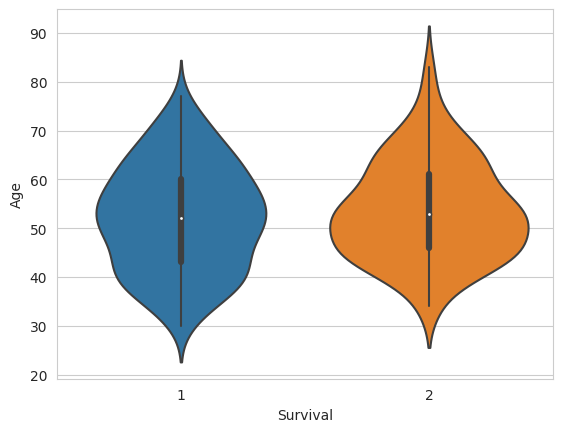

In [23]:
sns.violinplot(x='Survival',y='Age', data=haberman)
plt.show()

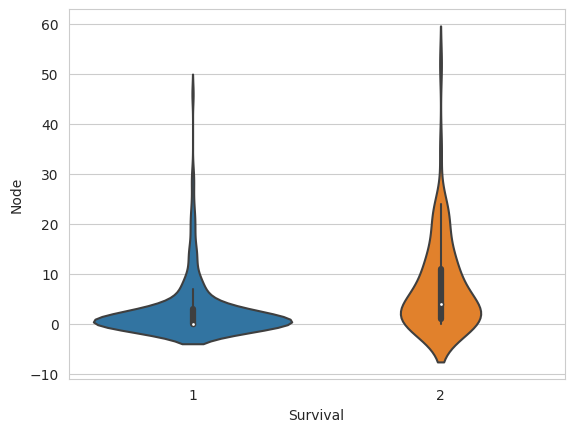

In [24]:
sns.violinplot(x='Survival',y='Node', data=haberman)
plt.show()